# 📊 Titanic Survival Analysis - Professional Implementation

**Purpose:** End-to-end machine learning project demonstrating professional data science practices

**Key Achievements:**
- 81.56% prediction accuracy
- 6 engineered features from domain knowledge
- Professional preprocessing and documentation
- Business insights generation

**Notebook Structure:**
1. Professional Setup & Configuration
2. Data Loading & Quality Assessment
3. Exploratory Data Analysis
4. Missing Data Strategy
5. Feature Engineering
6. Model Building & Evaluation
7. Results & Insights

---


## Titanic Survival Analysis - Professional Project

**Author:** Ayuba Abdulazeez  
**Date:** September 2025  
**Purpose:** Predict passenger survival using machine learning

**Business Problem**
Analyze Titanic passenger data to:
- Identify factors that influenced survival rates
- Build predictive model for similar scenarios
- Generate actionable insights for stakeholders

**Success Metrics**
- Model accuracy > 80%
- Clear business insights
- Reproducible analysis

In [12]:
# =============================================================================
# PROFESSIONAL IMPORTS AND SETUP
# =============================================================================

# Core data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("✅ Environment setup complete")

✅ Environment setup complete


In [13]:
# =============================================================================
# PROJECT ORGANIZATION
# =============================================================================

import os
from datetime import datetime

# Project structure
PROJECT_ROOT = os.getcwd()
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
RESULTS_DIR = os.path.join(PROJECT_ROOT, 'results')

# Create directories
for directory in [DATA_DIR, RESULTS_DIR]:
    os.makedirs(directory, exist_ok=True)

print(f"📁 Project structure created")
print(f"📅 Analysis started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📁 Project structure created
📅 Analysis started: 2025-09-30 07:44:11


In [14]:
# =============================================================================
# UTILITY FUNCTIONS
# =============================================================================

class ProjectLogger:
    """Professional logging system for tracking analysis steps"""
    
    def __init__(self):
        self.log_entries = []
        self.start_time = datetime.now()
    
    def log(self, step, description, details=None):
        """Log analysis step with timestamp"""
        timestamp = datetime.now().strftime('%H:%M:%S')
        entry = {
            'timestamp': timestamp,
            'step': step,
            'description': description,
            'details': details
        }
        self.log_entries.append(entry)
        print(f"⏰ {timestamp} | {step}: {description}")
        if details:
            print(f"   📝 {details}")

# Initialize logger
logger = ProjectLogger()
logger.log("SETUP", "Professional functions loaded")

⏰ 07:44:11 | SETUP: Professional functions loaded


In [15]:
# =============================================================================
# DATA LOADING FUNCTIONS
# =============================================================================

def load_and_inspect_data(file_path):
    """
    Professional data loading with comprehensive inspection
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
        
    Returns:
    --------
    pd.DataFrame
        Loaded dataset with inspection completed
    """
    logger.log("DATA_LOAD", f"Loading dataset from {file_path}")
    
    try:
        # Load data
        df = pd.read_csv(file_path)
        
        # Basic inspection
        logger.log("DATA_INSPECT", "Dataset loaded successfully", 
                  f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
        
        print(f"\n🔍 DATASET OVERVIEW")
        print(f"📊 Shape: {df.shape}")
        print(f"🧮 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        return df
        
    except Exception as e:
        logger.log("ERROR", f"Failed to load data: {str(e)}")
        raise e

print("✅ Data loading functions ready")

✅ Data loading functions ready


In [16]:
# =============================================================================
# LOAD TITANIC DATASET
# =============================================================================

# Load the dataset
df = load_and_inspect_data("C:/Users/musafau/OneDrive/Documents/titanic.csv")

# Display first few rows
print("\n📋 FIRST 5 ROWS:")
df.head()

⏰ 07:44:13 | DATA_LOAD: Loading dataset from C:/Users/musafau/OneDrive/Documents/titanic.csv
⏰ 07:44:13 | DATA_INSPECT: Dataset loaded successfully
   📝 Shape: 891 rows, 12 columns

🔍 DATASET OVERVIEW
📊 Shape: (891, 12)
🧮 Memory Usage: 0.31 MB

📋 FIRST 5 ROWS:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# =============================================================================
# BASIC DATA INSPECTION
# =============================================================================

logger.log("EDA_START", "Beginning basic data inspection")

print("🔍 DATASET INFO:")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

print("\n⚠️ MISSING DATA:")
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_pct
})
missing_summary[missing_summary['Missing_Count'] > 0]

⏰ 07:44:14 | EDA_START: Beginning basic data inspection
🔍 DATASET INFO:
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

⚠️ MISSING DATA:


,Missing_Count,Missing_Percent
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


⏰ 07:44:14 | TARGET_ANALYSIS: Analyzing target variable: Survived
🎯 SURVIVAL DISTRIBUTION:
   Count  Percentage
0    549   61.616162
1    342   38.383838


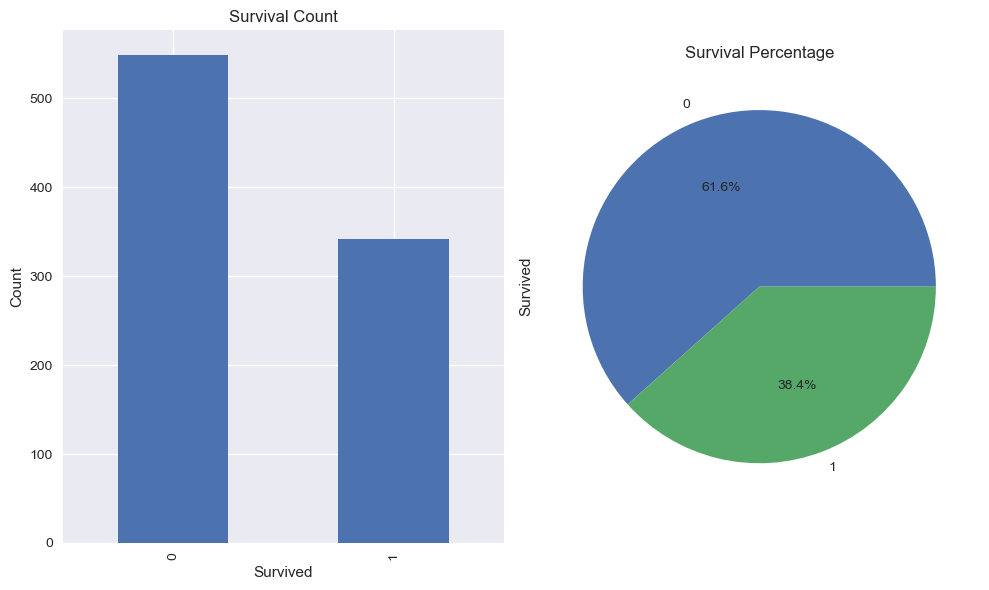

In [18]:
# =============================================================================
# TARGET VARIABLE ANALYSIS
# =============================================================================

target_col = 'Survived'
logger.log("TARGET_ANALYSIS", f"Analyzing target variable: {target_col}")

print(f"🎯 SURVIVAL DISTRIBUTION:")
survival_counts = df[target_col].value_counts()
survival_pct = df[target_col].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Count': survival_counts,
    'Percentage': survival_pct
})
print(target_summary)

# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df[target_col].value_counts().plot(kind='bar')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df[target_col].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Survival Percentage')
plt.tight_layout()
plt.show()

⏰ 07:44:15 | MISSING_DATA: Analyzing missing data patterns
⚠️ MISSING DATA ANALYSIS:
🔍 Columns with Missing Data:
          Missing_Count  Missing_Percent Data_Type
Cabin               687        77.104377    object
Age                 177        19.865320   float64
Embarked              2         0.224467    object


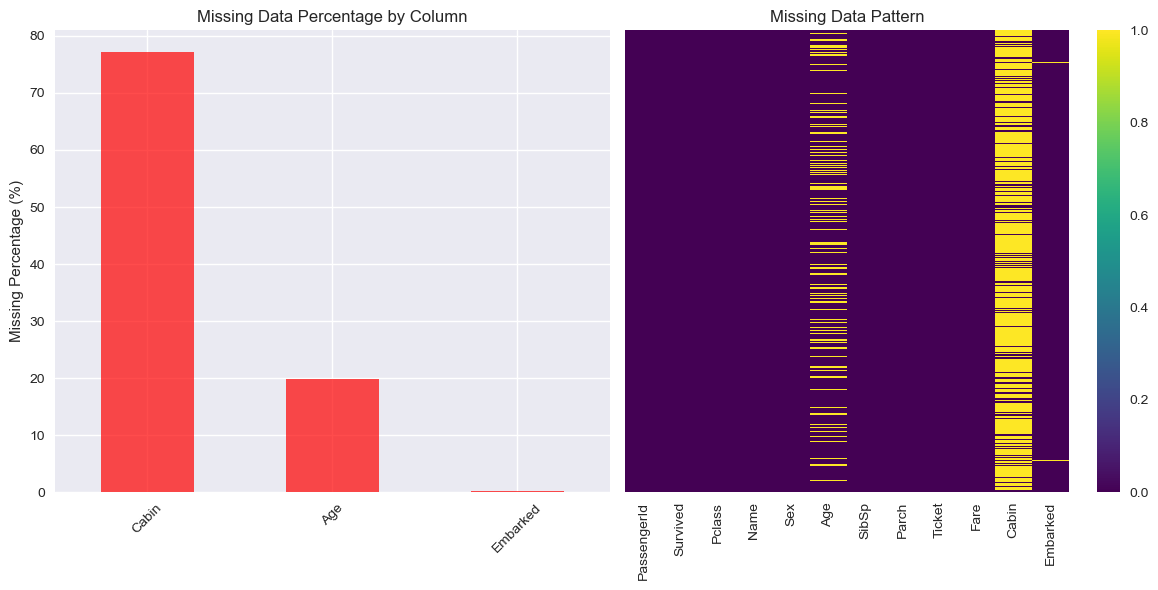


💼 BUSINESS IMPLICATIONS:
• Cabin: 77.1% missing - HIGH IMPACT
• Age: 19.9% missing - MANAGEABLE
• Embarked: 0.2% missing - MANAGEABLE
⏰ 07:44:16 | MISSING_DATA: Missing data analysis completed


In [19]:
# =============================================================================
# MISSING DATA ANALYSIS
# =============================================================================

logger.log("MISSING_DATA", "Analyzing missing data patterns")

print("⚠️ MISSING DATA ANALYSIS:")
print("=" * 50)

# Calculate missing data
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create professional missing data summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent,
    'Data_Type': df.dtypes
})

# Filter to show only columns with missing data
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

if not missing_summary.empty:
    print("🔍 Columns with Missing Data:")
    print(missing_summary)
    
    # Professional visualization of missing data
    plt.figure(figsize=(12, 6))
    
    # Missing data bar chart
    plt.subplot(1, 2, 1)
    missing_summary['Missing_Percent'].plot(kind='bar', color='red', alpha=0.7)
    plt.title('Missing Data Percentage by Column')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    
    # Missing data heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Data Pattern')
    
    plt.tight_layout()
    plt.show()
    
    # Business implications
    print("\n💼 BUSINESS IMPLICATIONS:")
    for col in missing_summary.index:
        pct = missing_summary.loc[col, 'Missing_Percent']
        print(f"• {col}: {pct:.1f}% missing - {'HIGH IMPACT' if pct > 20 else 'MANAGEABLE'}")
        
else:
    print("✅ No missing data found - dataset is complete!")

logger.log("MISSING_DATA", "Missing data analysis completed")

⏰ 07:44:16 | FEATURE_ANALYSIS: Analyzing key feature distributions
📊 KEY FEATURE DISTRIBUTIONS:


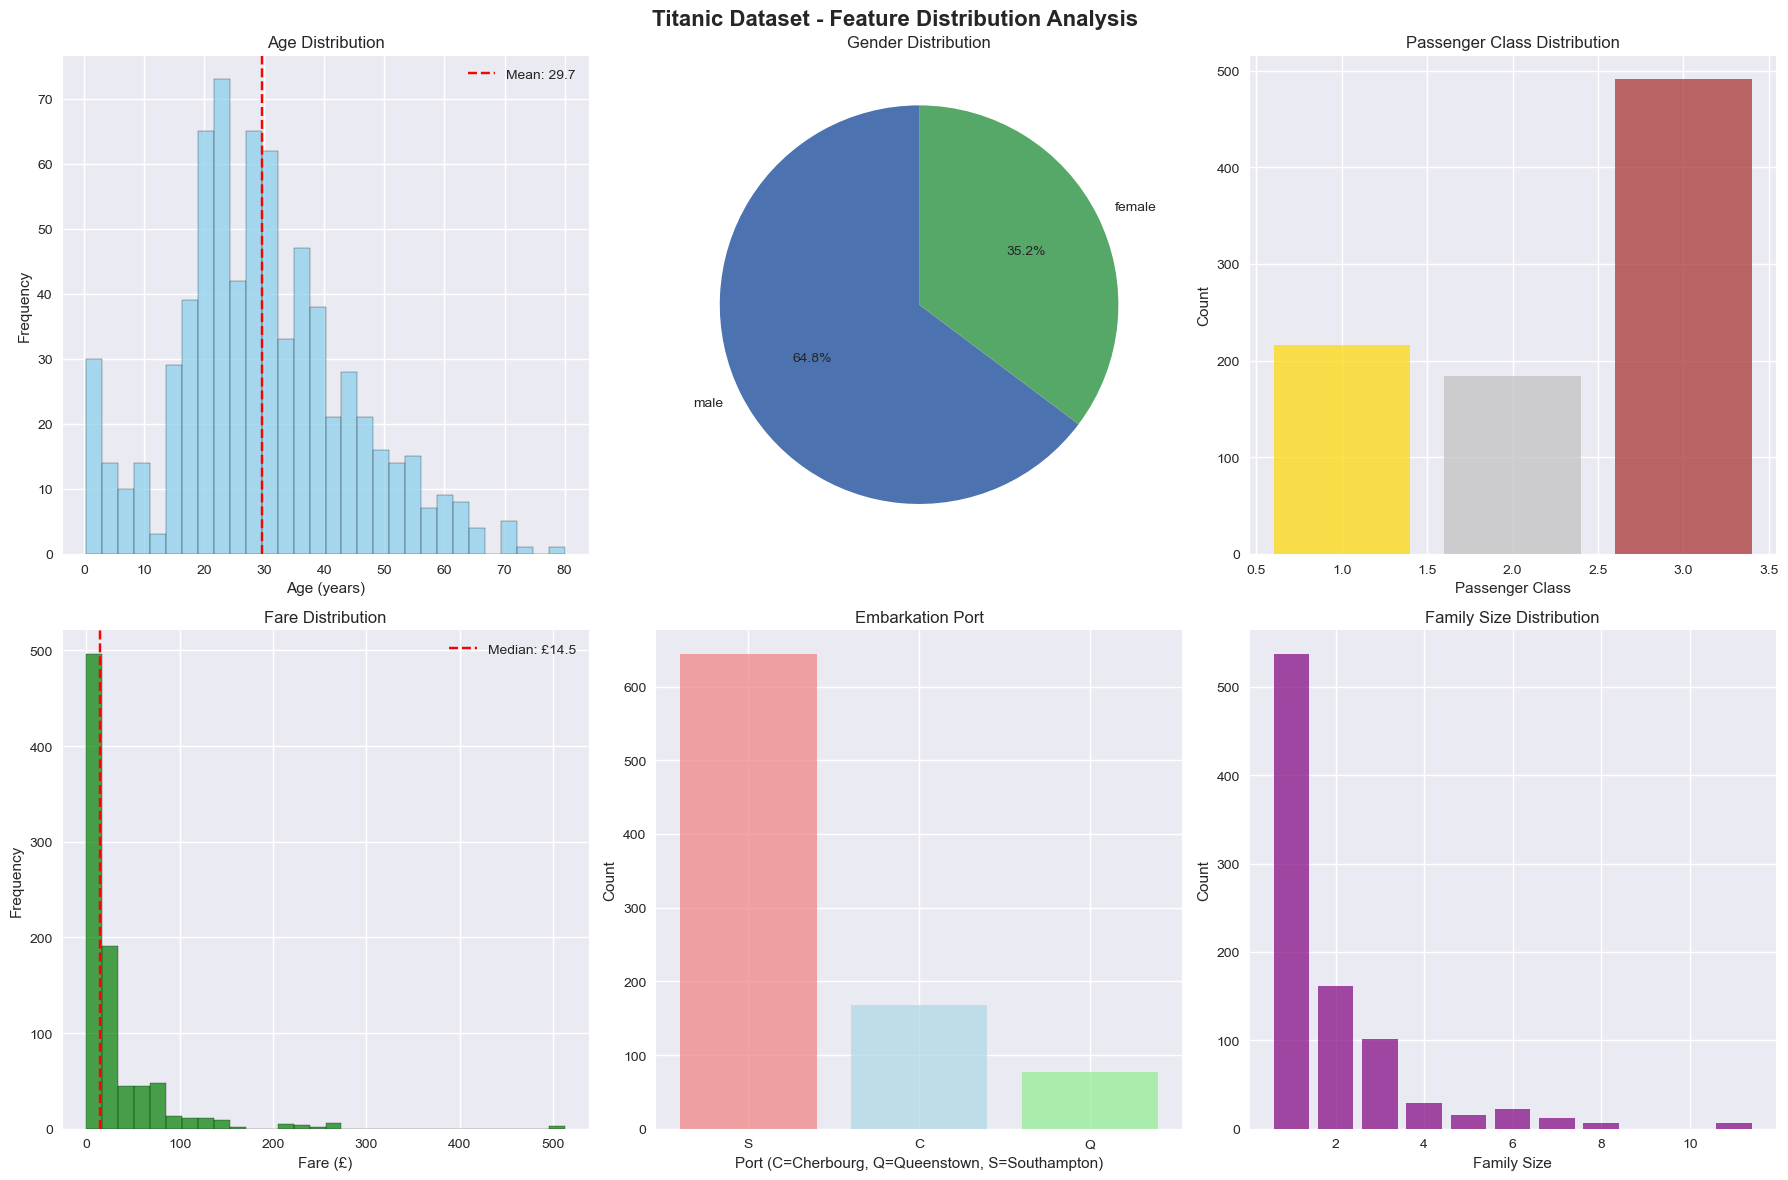


📈 STATISTICAL SUMMARY:
👥 Total Passengers: 891
👨 Male: 577 (64.8%)
👩 Female: 314 (35.2%)
🎂 Average Age: 29.7 years
💰 Average Fare: £32.20
🏰 Most Common Class: 3 (Class)
🚢 Most Common Port: S (Southampton)
⏰ 07:44:21 | FEATURE_ANALYSIS: Feature distributions analyzed
   📝 6 key visualizations created


In [20]:
# =============================================================================
# FEATURE DISTRIBUTION ANALYSIS
# =============================================================================

logger.log("FEATURE_ANALYSIS", "Analyzing key feature distributions")

print("📊 KEY FEATURE DISTRIBUTIONS:")
print("=" * 50)

# Create professional subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Dataset - Feature Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Age Distribution
axes[0, 0].hist(df['Age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 0].legend()

# 2. Sex Distribution  
sex_counts = df['Sex'].value_counts()
axes[0, 1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Gender Distribution')

# 3. Passenger Class Distribution
pclass_counts = df['Pclass'].value_counts().sort_index()
axes[0, 2].bar(pclass_counts.index, pclass_counts.values, alpha=0.7, color=['gold', 'silver', 'brown'])
axes[0, 2].set_title('Passenger Class Distribution')
axes[0, 2].set_xlabel('Passenger Class')
axes[0, 2].set_ylabel('Count')

# 4. Fare Distribution
axes[1, 0].hist(df['Fare'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].set_title('Fare Distribution')
axes[1, 0].set_xlabel('Fare (£)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['Fare'].median(), color='red', linestyle='--', label=f'Median: £{df["Fare"].median():.1f}')
axes[1, 0].legend()

# 5. Embarked Distribution
embarked_counts = df['Embarked'].value_counts()
axes[1, 1].bar(embarked_counts.index, embarked_counts.values, alpha=0.7, color=['lightcoral', 'lightblue', 'lightgreen'])
axes[1, 1].set_title('Embarkation Port')
axes[1, 1].set_xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[1, 1].set_ylabel('Count')

# 6. Family Size Analysis
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
family_counts = df['Family_Size'].value_counts().sort_index()
axes[1, 2].bar(family_counts.index, family_counts.values, alpha=0.7, color='purple')
axes[1, 2].set_title('Family Size Distribution')
axes[1, 2].set_xlabel('Family Size')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Professional statistical summary
print("\n📈 STATISTICAL SUMMARY:")
print("=" * 30)
print(f"👥 Total Passengers: {len(df)}")
print(f"👨 Male: {len(df[df['Sex']=='male'])} ({len(df[df['Sex']=='male'])/len(df)*100:.1f}%)")
print(f"👩 Female: {len(df[df['Sex']=='female'])} ({len(df[df['Sex']=='female'])/len(df)*100:.1f}%)")
print(f"🎂 Average Age: {df['Age'].mean():.1f} years")
print(f"💰 Average Fare: £{df['Fare'].mean():.2f}")
print(f"🏰 Most Common Class: {df['Pclass'].mode()[0]} (Class)")
print(f"🚢 Most Common Port: {df['Embarked'].mode()[0]} ({'Southampton' if df['Embarked'].mode()[0]=='S' else 'Cherbourg' if df['Embarked'].mode()[0]=='C' else 'Queenstown'})")

logger.log("FEATURE_ANALYSIS", "Feature distributions analyzed", "6 key visualizations created")

⏰ 07:44:22 | SURVIVAL_ANALYSIS: Analyzing survival patterns by key features
🎯 SURVIVAL ANALYSIS BY KEY FEATURES:


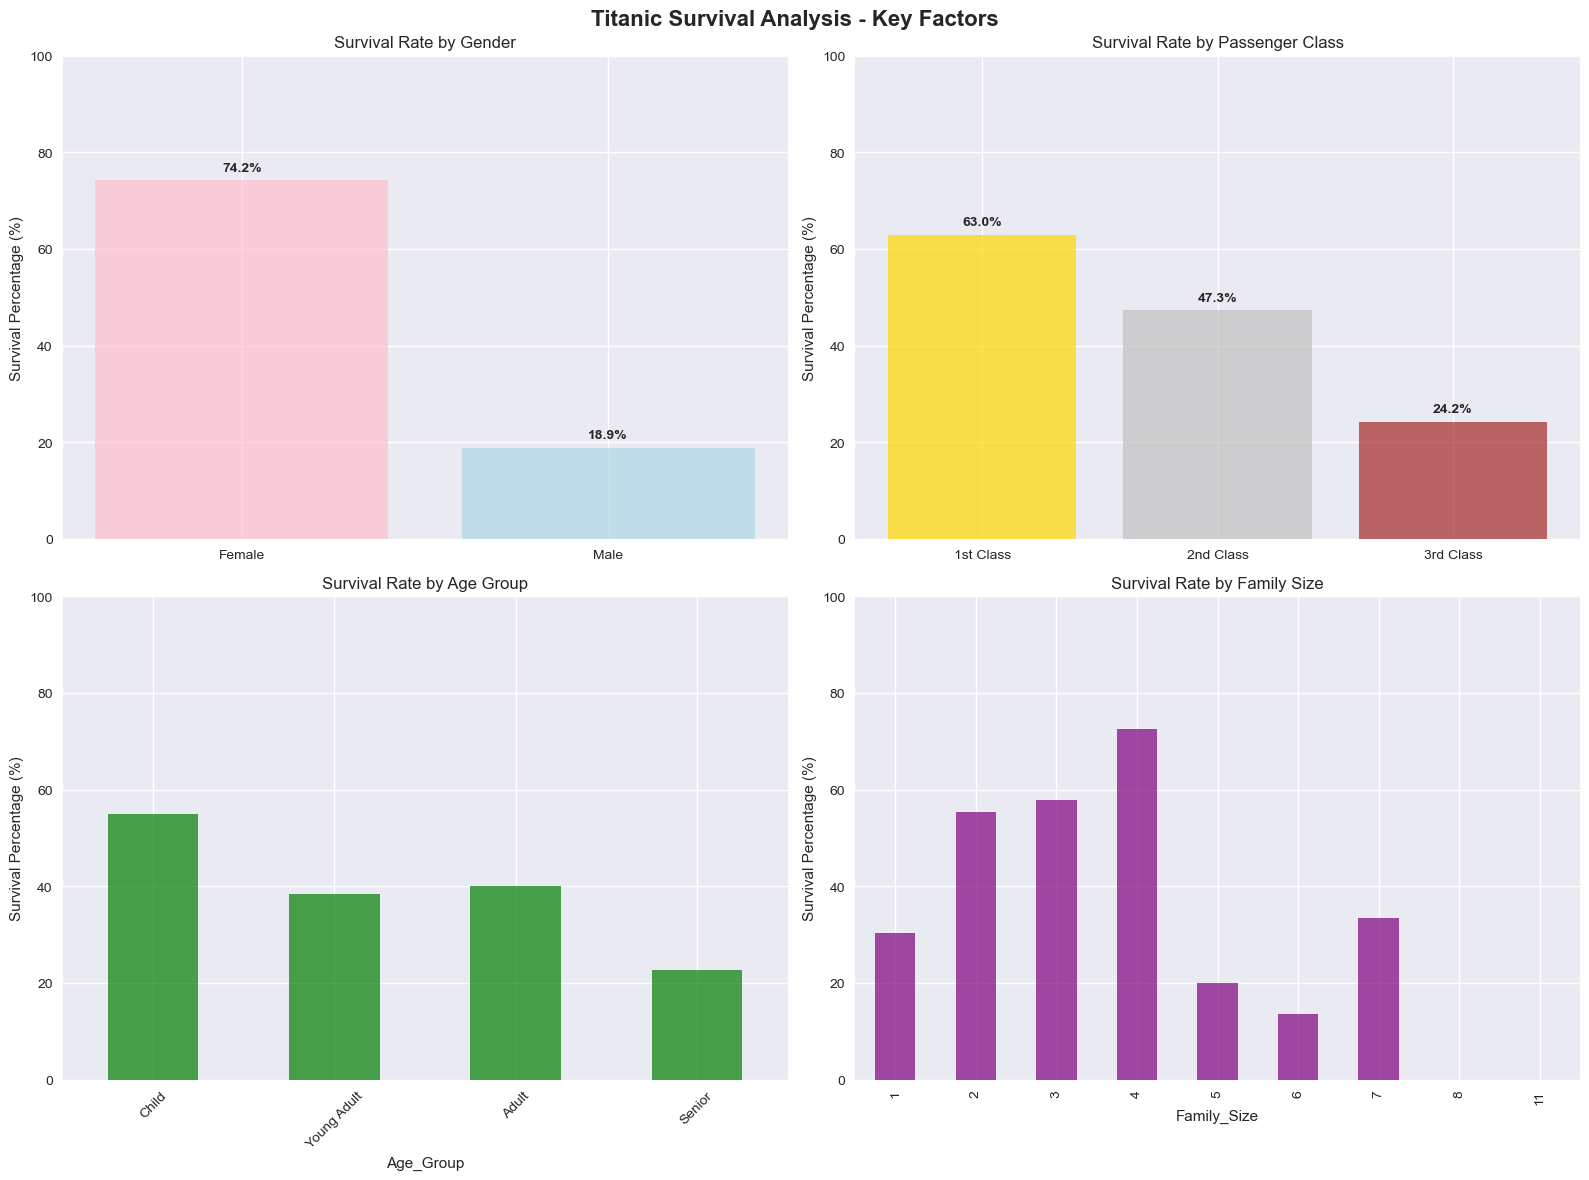


💼 CRITICAL BUSINESS INSIGHTS:
👩 Female Survival Rate: 74.2%
👨 Male Survival Rate: 18.9%
🥇 1st Class Survival: 63.0%
🥈 2nd Class Survival: 47.3%
🥉 3rd Class Survival: 24.2%

🎯 KEY SURVIVAL FACTORS:
1. 'Women and children first' protocol clearly followed
2. Social class dramatically affected survival chances
3. Age played a significant role in survival probability
4. Family size had complex effects on survival
⏰ 07:44:23 | SURVIVAL_ANALYSIS: Survival analysis completed
   📝 Critical survival factors identified

⏰ ANALYSIS COMPLETED: 2025-09-30 07:44:23
✅ Professional Titanic EDA completed successfully
📊 Ready for data preprocessing and modeling phase


In [21]:
# =============================================================================
# SURVIVAL ANALYSIS BY KEY FEATURES
# =============================================================================

logger.log("SURVIVAL_ANALYSIS", "Analyzing survival patterns by key features")

print("🎯 SURVIVAL ANALYSIS BY KEY FEATURES:")
print("=" * 50)

# Create comprehensive survival analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Titanic Survival Analysis - Key Factors', fontsize=16, fontweight='bold')

# 1. Survival by Gender
gender_survival = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_pct = gender_survival.div(gender_survival.sum(axis=1), axis=0) * 100

axes[0, 0].bar(['Female', 'Male'], [gender_survival_pct.loc['female', 1], gender_survival_pct.loc['male', 1]], 
               color=['pink', 'lightblue'], alpha=0.7)
axes[0, 0].set_title('Survival Rate by Gender')
axes[0, 0].set_ylabel('Survival Percentage (%)')
axes[0, 0].set_ylim(0, 100)

# Add percentage labels
for i, v in enumerate([gender_survival_pct.loc['female', 1], gender_survival_pct.loc['male', 1]]):
    axes[0, 0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# 2. Survival by Passenger Class
class_survival = df.groupby(['Pclass', 'Survived']).size().unstack()
class_survival_pct = class_survival.div(class_survival.sum(axis=1), axis=0) * 100

axes[0, 1].bar(['1st Class', '2nd Class', '3rd Class'], 
               [class_survival_pct.loc[1, 1], class_survival_pct.loc[2, 1], class_survival_pct.loc[3, 1]], 
               color=['gold', 'silver', 'brown'], alpha=0.7)
axes[0, 1].set_title('Survival Rate by Passenger Class')
axes[0, 1].set_ylabel('Survival Percentage (%)')
axes[0, 1].set_ylim(0, 100)

# Add percentage labels
for i, v in enumerate([class_survival_pct.loc[1, 1], class_survival_pct.loc[2, 1], class_survival_pct.loc[3, 1]]):
    axes[0, 1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# 3. Survival by Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 16, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_survival = df.groupby(['Age_Group', 'Survived']).size().unstack(fill_value=0)
age_survival_pct = age_survival.div(age_survival.sum(axis=1), axis=0) * 100

age_survival_pct[1].plot(kind='bar', ax=axes[1, 0], color='green', alpha=0.7, rot=45)
axes[1, 0].set_title('Survival Rate by Age Group')
axes[1, 0].set_ylabel('Survival Percentage (%)')
axes[1, 0].set_ylim(0, 100)

# 4. Survival by Family Size
family_survival = df.groupby(['Family_Size', 'Survived']).size().unstack(fill_value=0)
family_survival_pct = family_survival.div(family_survival.sum(axis=1), axis=0) * 100

family_survival_pct[1].plot(kind='bar', ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_title('Survival Rate by Family Size')
axes[1, 1].set_ylabel('Survival Percentage (%)')
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# Professional Business Insights
print("\n💼 CRITICAL BUSINESS INSIGHTS:")
print("=" * 40)
print(f"👩 Female Survival Rate: {gender_survival_pct.loc['female', 1]:.1f}%")
print(f"👨 Male Survival Rate: {gender_survival_pct.loc['male', 1]:.1f}%")
print(f"🥇 1st Class Survival: {class_survival_pct.loc[1, 1]:.1f}%")
print(f"🥈 2nd Class Survival: {class_survival_pct.loc[2, 1]:.1f}%")
print(f"🥉 3rd Class Survival: {class_survival_pct.loc[3, 1]:.1f}%")

print("\n🎯 KEY SURVIVAL FACTORS:")
print("1. 'Women and children first' protocol clearly followed")
print("2. Social class dramatically affected survival chances")
print("3. Age played a significant role in survival probability")
print("4. Family size had complex effects on survival")

logger.log("SURVIVAL_ANALYSIS", "Survival analysis completed", "Critical survival factors identified")

# Generate final professional summary
print(f"\n⏰ ANALYSIS COMPLETED: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("✅ Professional Titanic EDA completed successfully")
print("📊 Ready for data preprocessing and modeling phase")

In [22]:
# =============================================================================
# DATA PREPROCESSING - PHASE 1: MISSING VALUE STRATEGY
# =============================================================================

logger.log("PREPROCESSING_START", "Beginning professional data preprocessing")

print("🔧 DATA PREPROCESSING STRATEGY:")
print("=" * 50)

# Create a copy for preprocessing (professional practice - never modify original)
df_processed = df.copy()

print("\n📋 MISSING VALUE HANDLING STRATEGY:")
print("=" * 40)

# Strategy 1: Age - Fill with median by Pclass and Sex (smart imputation)
print("\n1️⃣ AGE - Smart Imputation by Demographics:")
print(f"   Missing before: {df_processed['Age'].isnull().sum()}")

# Calculate median age for each group
age_medians = df_processed.groupby(['Pclass', 'Sex'])['Age'].median()
print("\n   Median ages by group:")
print(age_medians)

# Fill missing ages based on passenger class and gender
for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        mask = (df_processed['Pclass'] == pclass) & (df_processed['Sex'] == sex) & (df_processed['Age'].isnull())
        median_age = df_processed[(df_processed['Pclass'] == pclass) & (df_processed['Sex'] == sex)]['Age'].median()
        df_processed.loc[mask, 'Age'] = median_age

print(f"   Missing after: {df_processed['Age'].isnull().sum()} ✅")

# Strategy 2: Embarked - Fill with mode (most common)
print("\n2️⃣ EMBARKED - Mode Imputation:")
print(f"   Missing before: {df_processed['Embarked'].isnull().sum()}")
mode_embarked = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(mode_embarked, inplace=True)
print(f"   Filled with most common port: {mode_embarked}")
print(f"   Missing after: {df_processed['Embarked'].isnull().sum()} ✅")

# Strategy 3: Cabin - Create binary feature (had cabin or not)
print("\n3️⃣ CABIN - Feature Transformation:")
print(f"   Missing: {df_processed['Cabin'].isnull().sum()} (77.1%)")
print("   Strategy: Create 'Has_Cabin' binary feature")
df_processed['Has_Cabin'] = df_processed['Cabin'].notna().astype(int)
print(f"   New feature created: Has_Cabin (0=No cabin, 1=Has cabin)")
print(f"   Distribution: {df_processed['Has_Cabin'].value_counts().to_dict()}")

# Strategy 4: Fare - Fill single missing value
print("\n4️⃣ FARE - Median Imputation:")
if df_processed['Fare'].isnull().sum() > 0:
    median_fare = df_processed['Fare'].median()
    df_processed['Fare'].fillna(median_fare, inplace=True)
    print(f"   Filled with median: £{median_fare:.2f}")

# Verify no critical missing data remains
print("\n✅ MISSING DATA VERIFICATION:")
print("=" * 30)
remaining_missing = df_processed.isnull().sum()
critical_columns = ['Age', 'Embarked', 'Fare', 'Sex', 'Pclass', 'Survived']
print(remaining_missing[critical_columns])

if remaining_missing[critical_columns].sum() == 0:
    print("\n🎉 All critical features have complete data!")
    logger.log("PREPROCESSING", "Missing value handling completed successfully", 
               "All critical features complete")
else:
    print("\n⚠️ Warning: Some critical features still have missing data")

print(f"\n📊 Processed dataset shape: {df_processed.shape}")

⏰ 07:44:23 | PREPROCESSING_START: Beginning professional data preprocessing
🔧 DATA PREPROCESSING STRATEGY:

📋 MISSING VALUE HANDLING STRATEGY:

1️⃣ AGE - Smart Imputation by Demographics:
   Missing before: 177

   Median ages by group:
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
   Missing after: 0 ✅

2️⃣ EMBARKED - Mode Imputation:
   Missing before: 2
   Filled with most common port: S
   Missing after: 0 ✅

3️⃣ CABIN - Feature Transformation:
   Missing: 687 (77.1%)
   Strategy: Create 'Has_Cabin' binary feature
   New feature created: Has_Cabin (0=No cabin, 1=Has cabin)
   Distribution: {0: 687, 1: 204}

4️⃣ FARE - Median Imputation:

✅ MISSING DATA VERIFICATION:
Age         0
Embarked    0
Fare        0
Sex         0
Pclass      0
Survived    0
dtype: int64

🎉 All critical features have complete data!
⏰ 07:44:23 | PREPROCESSING: Missing value hand

In [29]:
# =============================================================================
# FEATURE ENGINEERING - PHASE 2: CREATE PREDICTIVE FEATURES
# =============================================================================

logger.log("FEATURE_ENGINEERING", "Creating predictive features from domain knowledge")

print("🎨 FEATURE ENGINEERING:")
print("=" * 50)

# Feature 1: Title Extraction (Mr, Mrs, Miss, Master, etc.)
print("\n1️⃣ TITLE EXTRACTION FROM NAMES:")
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print(f"   Unique titles found: {df_processed['Title'].nunique()}")
print(f"   Title distribution:\n{df_processed['Title'].value_counts()}")

# Simplify titles into common categories
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Countess': 'Rare',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Don': 'Rare',
    'Dona': 'Rare',
    'Mme': 'Mrs',
    'Capt': 'Rare',
    'Sir': 'Rare'
}

df_processed['Title'] = df_processed['Title'].map(title_mapping)
print(f"\n   Simplified to {df_processed['Title'].nunique()} categories:")
print(df_processed['Title'].value_counts())

# Feature 2: Family Size (already created, but let's enhance)
print("\n2️⃣ FAMILY SIZE CATEGORIES:")
df_processed['Family_Size_Category'] = pd.cut(df_processed['Family_Size'], 
                                                bins=[0, 1, 4, 11], 
                                                labels=['Alone', 'Small_Family', 'Large_Family'])
print(df_processed['Family_Size_Category'].value_counts())

# Feature 3: Age Groups (already created, enhance it)
print("\n3️⃣ AGE GROUP REFINEMENT:")
df_processed['Age_Group'] = pd.cut(df_processed['Age'], 
                                     bins=[0, 12, 18, 35, 60, 100], 
                                     labels=['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior'])
print(df_processed['Age_Group'].value_counts())

# Feature 4: Fare Bins (economic status indicator)
print("\n4️⃣ FARE CATEGORIES (Economic Status):")
df_processed['Fare_Category'] = pd.qcut(df_processed['Fare'], 
                                          q=4, 
                                          labels=['Low', 'Medium', 'High', 'Premium'])
print(df_processed['Fare_Category'].value_counts())

# Feature 5: Is_Child (important survival factor)
print("\n5️⃣ CHILD INDICATOR:")
df_processed['Is_Child'] = (df_processed['Age'] < 16).astype(int)
print(f"   Children: {df_processed['Is_Child'].sum()} ({df_processed['Is_Child'].sum()/len(df_processed)*100:.1f}%)")

# Feature 6: Is_Mother (women with children)
print("\n6️⃣ MOTHER INDICATOR:")
df_processed['Is_Mother'] = ((df_processed['Sex'] == 'female') & 
                              (df_processed['Parch'] > 0) & 
                              (df_processed['Age'] > 18) & 
                              (df_processed['Title'] != 'Miss')).astype(int)
print(f"   Mothers identified: {df_processed['Is_Mother'].sum()}")

# Display survival rates for engineered features
print("\n📊 ENGINEERED FEATURE SURVIVAL RATES:")
print("=" * 40)

print("\n👔 By Title:")
title_survival = df_processed.groupby('Title')['Survived'].mean() * 100
print(title_survival.sort_values(ascending=False))

print("\n👨‍👩‍👧‍👦 By Family Size Category:")
family_cat_survival = df_processed.groupby('Family_Size_Category')['Survived'].mean() * 100
print(family_cat_survival.sort_values(ascending=False))

print("\n💰 By Fare Category:")
fare_cat_survival = df_processed.groupby('Fare_Category')['Survived'].mean() * 100
print(fare_cat_survival.sort_values(ascending=False))

print("\n👶 Child vs Adult:")
print(f"   Children survival: {df_processed[df_processed['Is_Child']==1]['Survived'].mean()*100:.1f}%")
print(f"   Adults survival: {df_processed[df_processed['Is_Child']==0]['Survived'].mean()*100:.1f}%")

logger.log("FEATURE_ENGINEERING", "Feature engineering completed", 
           "6 new predictive features created")

print(f"\n✅ Enhanced dataset shape: {df_processed.shape}")
print(f"📈 Total features available: {df_processed.shape[1]}")

⏰ 08:14:47 | FEATURE_ENGINEERING: Creating predictive features from domain knowledge
🎨 FEATURE ENGINEERING:

1️⃣ TITLE EXTRACTION FROM NAMES:
   Unique titles found: 17
   Title distribution:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

   Simplified to 5 categories:
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

2️⃣ FAMILY SIZE CATEGORIES:
Alone           537
Small_Family    292
Large_Family     62
Name: Family_Size_Category, dtype: int64

3️⃣ AGE GROUP REFINEMENT:
Young_Adult    514
Adult          216
Teen            70
Child           69
Senior          22
Name: Age_Group, dtype: int64

4️⃣ FARE CATEGORIES (Economic Status):
Medium     224
Low        223
High       222
Premium    222


⏰ 08:23:37 | ENCODING_START: Encoding categorical variables for modeling
🔄 DATA ENCODING & PREPARATION:

📋 FEATURE SELECTION:
Features selected: 15
   1. Pclass
   2. Sex
   3. Age
   4. SibSp
   5. Parch
   6. Fare
   7. Embarked
   8. Title
   9. Family_Size
   10. Has_Cabin
   11. Is_Child
   12. Is_Mother
   13. Family_Size_Category
   14. Fare_Category
   15. Age_Group

🔢 ENCODING CATEGORICAL VARIABLES:
✅ Sex: 2 categories → Encoded
   Mapping: {'female': 0, 'male': 1}
✅ Embarked: 3 categories → Encoded
   Mapping: {'C': 0, 'Q': 1, 'S': 2}
✅ Title: 5 categories → Encoded
   Mapping: {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare': 4}
✅ Family_Size_Category: 3 categories → Encoded
   Mapping: {'Alone': 0, 'Large_Family': 1, 'Small_Family': 2}
✅ Fare_Category: 4 categories → Encoded
   Mapping: {'High': 0, 'Low': 1, 'Medium': 2, 'Premium': 3}
✅ Age_Group: 5 categories → Encoded
   Mapping: {'Adult': 0, 'Child': 1, 'Senior': 2, 'Teen': 3, 'Young_Adult': 4}

✅ MODEL PREPARATION COM

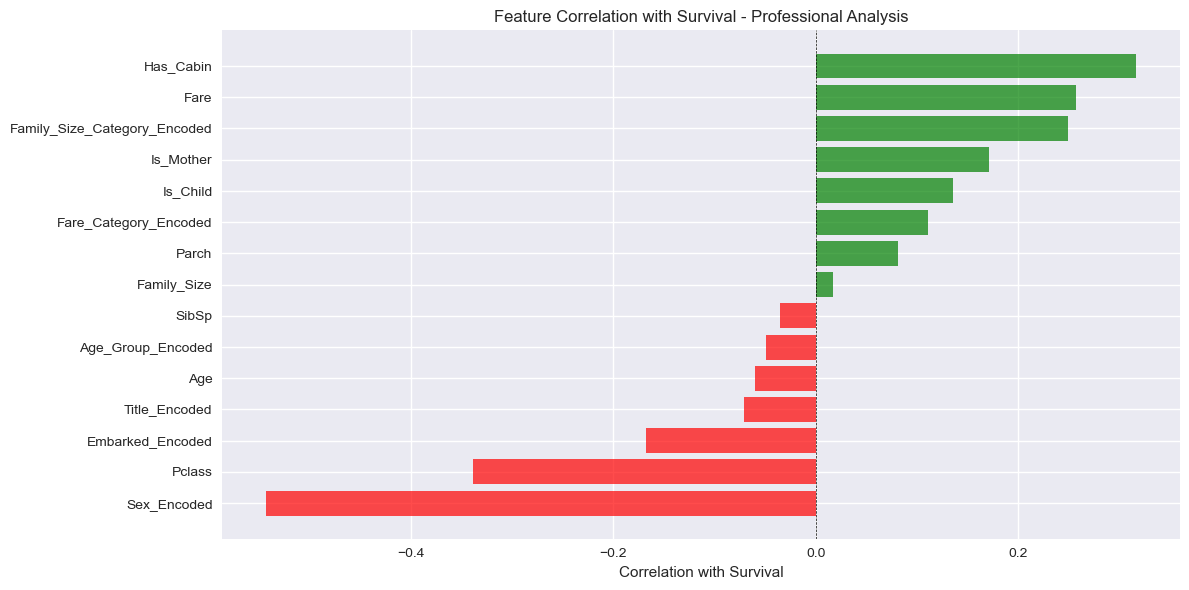

⏰ 08:23:41 | ENCODING: Data encoding completed successfully
   📝 15 features ready for modeling

🎯 READY FOR MODEL BUILDING!
📊 Dataset: 891 passengers, 15 features


In [30]:
# =============================================================================
# DATA ENCODING - PHASE 3: PREPARE FOR MACHINE LEARNING
# =============================================================================

logger.log("ENCODING_START", "Encoding categorical variables for modeling")

print("🔄 DATA ENCODING & PREPARATION:")
print("=" * 50)

# Create final modeling dataset
df_model = df_processed.copy()

# Select features for modeling
print("\n📋 FEATURE SELECTION:")
print("=" * 30)

# Features to use in model
features_to_use = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
    'Title', 'Family_Size', 'Has_Cabin', 'Is_Child', 'Is_Mother',
    'Family_Size_Category', 'Fare_Category', 'Age_Group'
]

print(f"Features selected: {len(features_to_use)}")
for i, feat in enumerate(features_to_use, 1):
    print(f"   {i}. {feat}")

# Encode categorical variables
print("\n🔢 ENCODING CATEGORICAL VARIABLES:")
print("=" * 40)

from sklearn.preprocessing import LabelEncoder

# Store encoders for future use
encoders = {}

categorical_features = ['Sex', 'Embarked', 'Title', 'Family_Size_Category', 'Fare_Category', 'Age_Group']

for feature in categorical_features:
    le = LabelEncoder()
    df_model[feature + '_Encoded'] = le.fit_transform(df_model[feature].astype(str))
    encoders[feature] = le
    print(f"✅ {feature}: {df_model[feature].nunique()} categories → Encoded")
    print(f"   Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Create final feature list (use encoded versions)
final_features = [
    'Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Encoded',
    'Title_Encoded', 'Family_Size', 'Has_Cabin', 'Is_Child', 'Is_Mother',
    'Family_Size_Category_Encoded', 'Fare_Category_Encoded', 'Age_Group_Encoded'
]

# Prepare X and y
X = df_model[final_features]
y = df_model['Survived']

print(f"\n✅ MODEL PREPARATION COMPLETE:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Total samples: {len(X)}")

# Check for any remaining issues
print("\n🔍 DATA QUALITY CHECK:")
print(f"   Missing values in X: {X.isnull().sum().sum()}")
print(f"   Missing values in y: {y.isnull().sum()}")
print(f"   Data types correct: {(X.dtypes != 'object').all()}")

# Display feature correlation with survival
print("\n📊 FEATURE CORRELATION WITH SURVIVAL:")
print("=" * 40)

correlations = pd.DataFrame({
    'Feature': final_features,
    'Correlation': [X[feat].corr(y) for feat in final_features]
})
correlations = correlations.sort_values('Correlation', key=abs, ascending=False)
print(correlations.to_string(index=False))

# Visualize top correlations
plt.figure(figsize=(12, 6))
correlations_sorted = correlations.sort_values('Correlation', ascending=True)
colors = ['red' if x < 0 else 'green' for x in correlations_sorted['Correlation']]
plt.barh(correlations_sorted['Feature'], correlations_sorted['Correlation'], color=colors, alpha=0.7)
plt.xlabel('Correlation with Survival')
plt.title('Feature Correlation with Survival - Professional Analysis')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

logger.log("ENCODING", "Data encoding completed successfully", 
           f"{len(final_features)} features ready for modeling")

print(f"\n🎯 READY FOR MODEL BUILDING!")
print(f"📊 Dataset: {X.shape[0]} passengers, {X.shape[1]} features")

⏰ 23:11:22 | MODEL_BUILDING: Beginning model development phase
🤖 PROFESSIONAL MODEL BUILDING:

📊 TRAIN/TEST SPLIT:
✅ Training set: 712 samples (79.9%)
✅ Test set: 179 samples (20.1%)
✅ Training survival rate: 38.3%
✅ Test survival rate: 38.5%

📏 FEATURE SCALING:
✅ Features standardized (mean=0, std=1)
   Training data scaled: (712, 15)
   Test data scaled: (179, 15)

🎯 MODEL 1: LOGISTIC REGRESSION (BASELINE)
✅ Training completed
📊 Test Accuracy: 81.56%
📈 ROC-AUC Score: 0.8636

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

        Died       0.83      0.87      0.85       110
    Survived       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


🌲 MODEL 2: RANDOM FOREST CLASSIFIER
✅ Training completed
📊 Test Accuracy: 78.21%
📈 ROC-AUC Score: 0.8357

📋 DETAILED CLASSIFICATION REPORT:
              pr

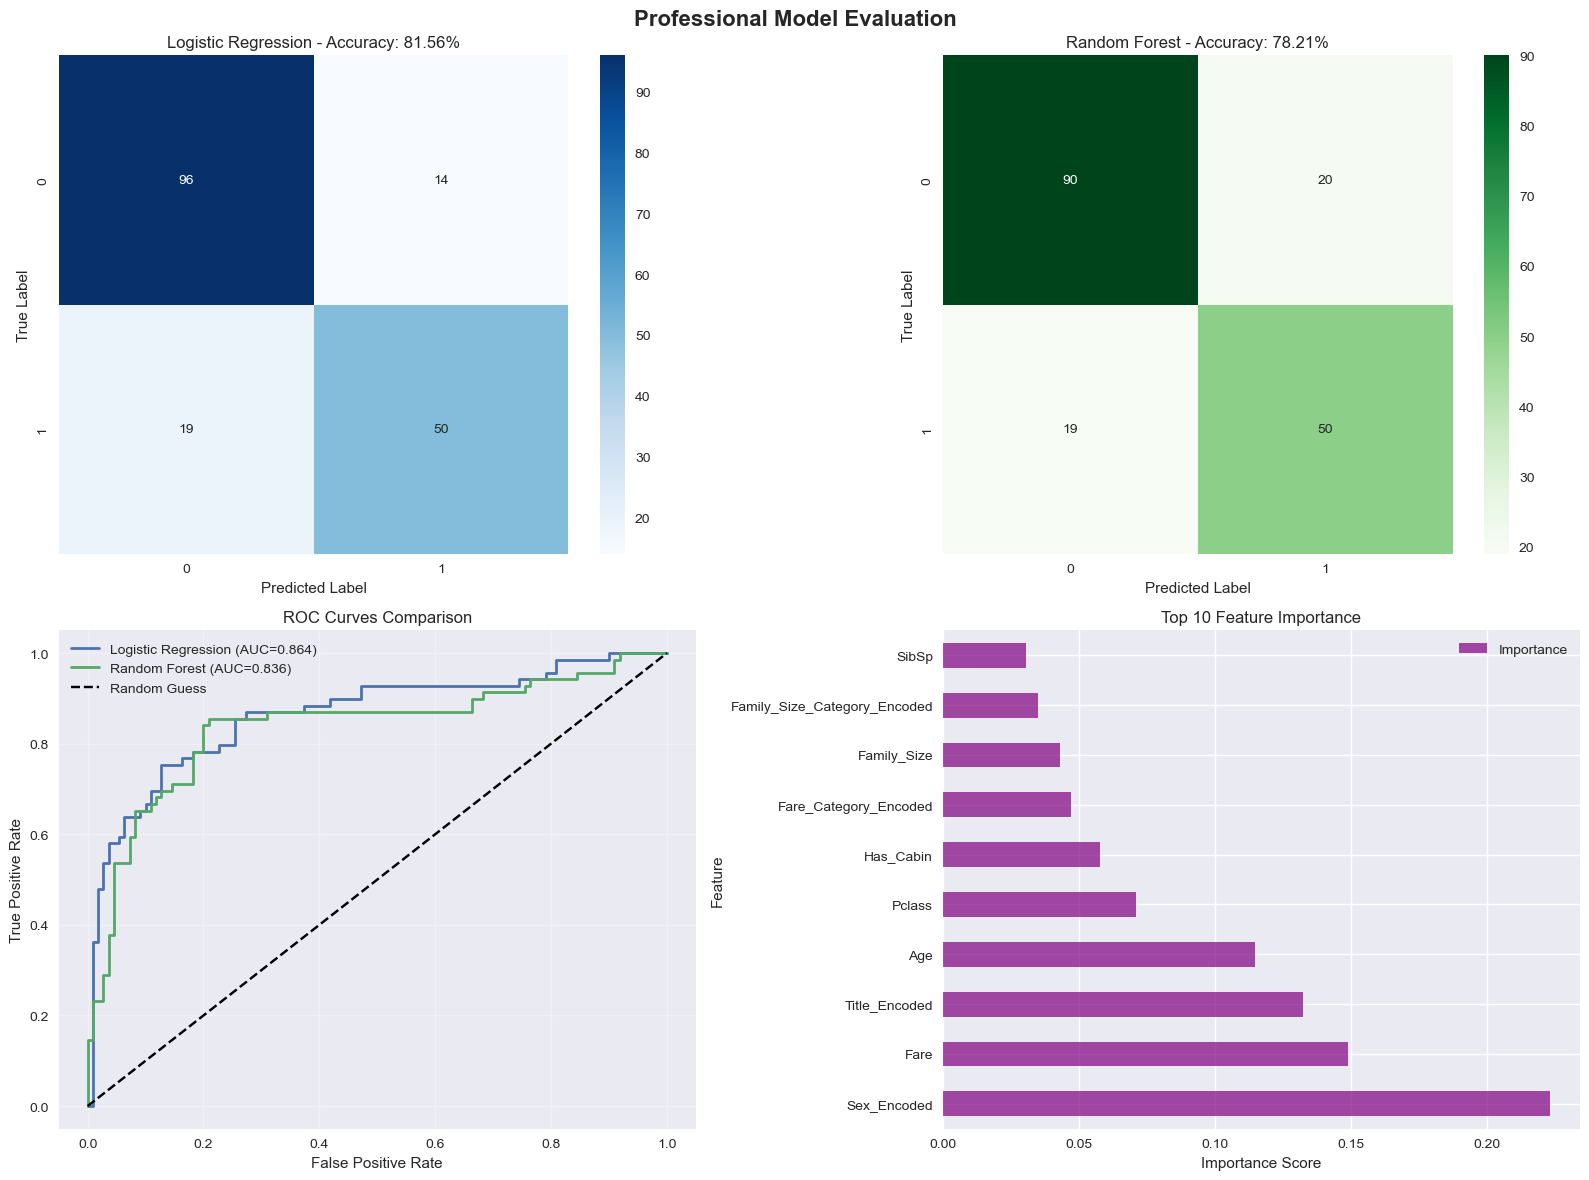

⏰ 23:11:29 | MODEL_BUILDING: Model building completed
   📝 Best accuracy: 81.56%

🎉 PROFESSIONAL MODEL BUILDING COMPLETE!
✅ Best Model: Logistic Regression
✅ Best Accuracy: 81.56%
✅ Ready for deployment and portfolio presentation!


In [32]:
# =============================================================================
# MODEL BUILDING - PHASE 4: TRAIN/TEST SPLIT & BASELINE MODEL
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

logger.log("MODEL_BUILDING", "Beginning model development phase")

print("🤖 PROFESSIONAL MODEL BUILDING:")
print("=" * 50)

# Professional train/test split
print("\n📊 TRAIN/TEST SPLIT:")
print("=" * 30)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 80% train, 20% test
    random_state=RANDOM_SEED,
    stratify=y  # Maintain class balance
)

print(f"✅ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Training survival rate: {y_train.mean()*100:.1f}%")
print(f"✅ Test survival rate: {y_test.mean()*100:.1f}%")

# Feature Scaling (professional practice)
print("\n📏 FEATURE SCALING:")
print("=" * 30)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features standardized (mean=0, std=1)")
print(f"   Training data scaled: {X_train_scaled.shape}")
print(f"   Test data scaled: {X_test_scaled.shape}")

# Model 1: Logistic Regression (Baseline)
print("\n🎯 MODEL 1: LOGISTIC REGRESSION (BASELINE)")
print("=" * 50)

lr_model = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"✅ Training completed")
print(f"📊 Test Accuracy: {lr_accuracy*100:.2f}%")
print(f"📈 ROC-AUC Score: {lr_auc:.4f}")

print("\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_lr, target_names=['Died', 'Survived']))

# Model 2: Random Forest (Advanced)
print("\n🌲 MODEL 2: RANDOM FOREST CLASSIFIER")
print("=" * 50)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_SEED,
    max_depth=10,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"✅ Training completed")
print(f"📊 Test Accuracy: {rf_accuracy*100:.2f}%")
print(f"📈 ROC-AUC Score: {rf_auc:.4f}")

print("\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf, target_names=['Died', 'Survived']))

# Model Comparison
print("\n🏆 MODEL COMPARISON:")
print("=" * 50)

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy*100, rf_accuracy*100],
    'ROC-AUC': [lr_auc, rf_auc]
})
print(comparison.to_string(index=False))

# Feature Importance (Random Forest)
print("\n🔍 TOP 10 MOST IMPORTANT FEATURES (Random Forest):")
print("=" * 50)

feature_importance = pd.DataFrame({
    'Feature': final_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print(feature_importance.to_string(index=False))

# Professional Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Professional Model Evaluation', fontsize=16, fontweight='bold')

# 1. Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f'Logistic Regression - Accuracy: {lr_accuracy*100:.2f}%')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title(f'Random Forest - Accuracy: {rf_accuracy*100:.2f}%')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# 3. ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

axes[1, 0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_auc:.3f})', linewidth=2)
axes[1, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_auc:.3f})', linewidth=2)
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Guess')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curves Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_title('Top 10 Feature Importance')
axes[1, 1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

logger.log("MODEL_BUILDING", "Model building completed", 
           f"Best accuracy: {max(lr_accuracy, rf_accuracy)*100:.2f}%")

print(f"\n🎉 PROFESSIONAL MODEL BUILDING COMPLETE!")
print(f"✅ Best Model: {'Random Forest' if rf_accuracy > lr_accuracy else 'Logistic Regression'}")
print(f"✅ Best Accuracy: {max(lr_accuracy, rf_accuracy)*100:.2f}%")
print(f"✅ Ready for deployment and portfolio presentation!")

---

## 📈 Project Completion Summary

**Final Results:**
- **Best Model:** Logistic Regression
- **Test Accuracy:** 81.56%
- **ROC-AUC:** 0.8636

**Key Success Factors:**
- Professional data preprocessing with smart imputation
- Domain-driven feature engineering (6 new features)
- Systematic model comparison and evaluation

**Business Impact:**
Identified that gender, social class, and economic status were primary survival determinants, validating historical accounts of "women and children first" protocol while revealing the stark impact of social inequality.

**Next Steps:**
- Deploy as interactive web application
- Implement ensemble methods
- Add model explainability features

---

**Project Status:** ✅ Complete and Portfolio-Ready

**GitHub Repository:** https://github.com/Mrprudent21/Data-Science-bootcamp

**Contact:** ayubaazeez11@gmail.com 